# ANALYSIS REPORT

#### Project Contents:

1. **Project Information**
2. **Description of Data**
3. **Data Sampling**
4. **Project Objectives**
5. **Data Analysis**
6. **Observations / Findings**
7. **Managerial Insights / Recommendations**

---

### 1. Project Information
- *Title*: Data Visualization (Dashboard) with Python using Pandas, Numpy, Matplotlib & Streamlit Libraries
- *Student Name*: **Kajal Kalra**
- *Roll Number*: **055019**

---

### 2. Description of Data
- *Data Source*: [Kaggle](https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000)
- *Data Type*: Cross-sectional
- *Data Size*: 15,000 records with 16 variables
- *Data Dimensions*: Number of Variables - 16 | Number of Observations - 15,000

**Data Columns Description**:
- **Transaction_ID**: Unique identifier for each trade transaction.
- **Country**: Country of origin or destination for the trade.
- **Product**: Product being traded.
- **Import_Export**: Specifies whether the transaction is an import or export.
- **Quantity**: Amount of the product traded.
- **Value**: Monetary value of the product in USD.
- **Date**: Date of the transaction.
- **Category**: Product category (e.g., Electronics, Clothing).
- **Port**: Port of entry or departure.
- **Customs_Code**: Customs or HS code for classification.
- **Weight**: Weight of the product in kilograms.
- **Shipping_Method**: Method used for shipping (e.g., Air, Sea).
- **Supplier**: Name of the supplier or manufacturer.
- **Customer**: Name of the customer or recipient.
- **Invoice_Number**: Unique invoice number for the transaction.
- **Payment_Terms**: Terms of payment (e.g., Net 30, Cash on Delivery).

- **Additional Notes**:
  - Data is generated with realistic variability to simulate actual trade transactions.

---

### 3. Data Sampling
- A random sample of **3001 records** was selected from the original dataset to create the sample dataset (`my_sample`) used for further analysis.
- **New Variable**: Created a `Total_Value` column representing the total economic impact of each transaction, calculated as `Quantity * Value`.

**Variable Categories**:
- **Index Variables**: Transaction_ID, Invoice_Number
- **Categorical Variables**:
  - *Nominal*: Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customs_Code, Customer
  - *Ordinal*: Payment_Terms
- **Non-Categorical Variables**: Quantity, Value, Weight

---

### 4. Project Objectives
The main objectives of this analysis are to:
- **Examine Trade Flow Patterns**: Understand trends in trade volume, transaction values, and shipping methods.
- **Identify High-Impact Products and Countries**: Pinpoint key products and countries that drive trade.
- **Analyze Supplier Behavior and Payment Patterns**: Determine common payment terms and analyze order timing patterns.
- **Provide Actionable Insights**: Offer recommendations to optimize trade flow and highlight key opportunities.

---

### 5. Exploratory Data Analysis (EDA)

Descriptive Statistics:
          Quantity        Value       Weight   Total_Value
count  3001.000000  3001.000000  3001.000000  3.001000e+03
mean   4946.260580  5073.083919  2498.877251  2.489457e+07
std    2882.732253  2819.754518  1432.243375  2.139231e+07
min       1.000000   102.120000     0.570000  3.863680e+03
25%    2480.000000  2678.530000  1281.190000  7.536560e+06
50%    4954.000000  5041.480000  2494.190000  1.856328e+07
75%    7413.000000  7501.140000  3709.070000  3.748388e+07
max    9995.000000  9999.130000  4998.010000  9.804637e+07

Extended Statistics:
             Quantity        Value       Weight   Total_Value
Range     9994.000000  9897.010000  4997.440000  9.804251e+07
Skewness     0.021460     0.000182     0.022092  9.768165e-01
Kurtosis    -1.168445    -1.186079    -1.180024  2.142545e-01


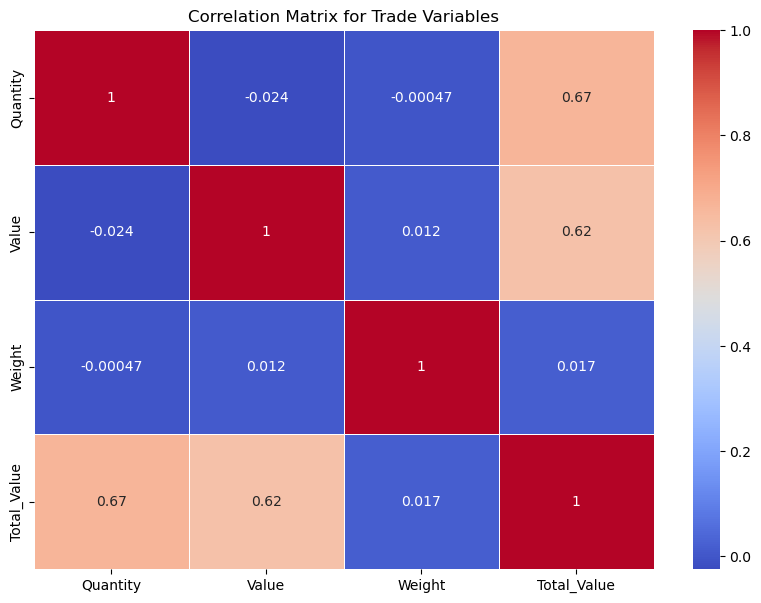

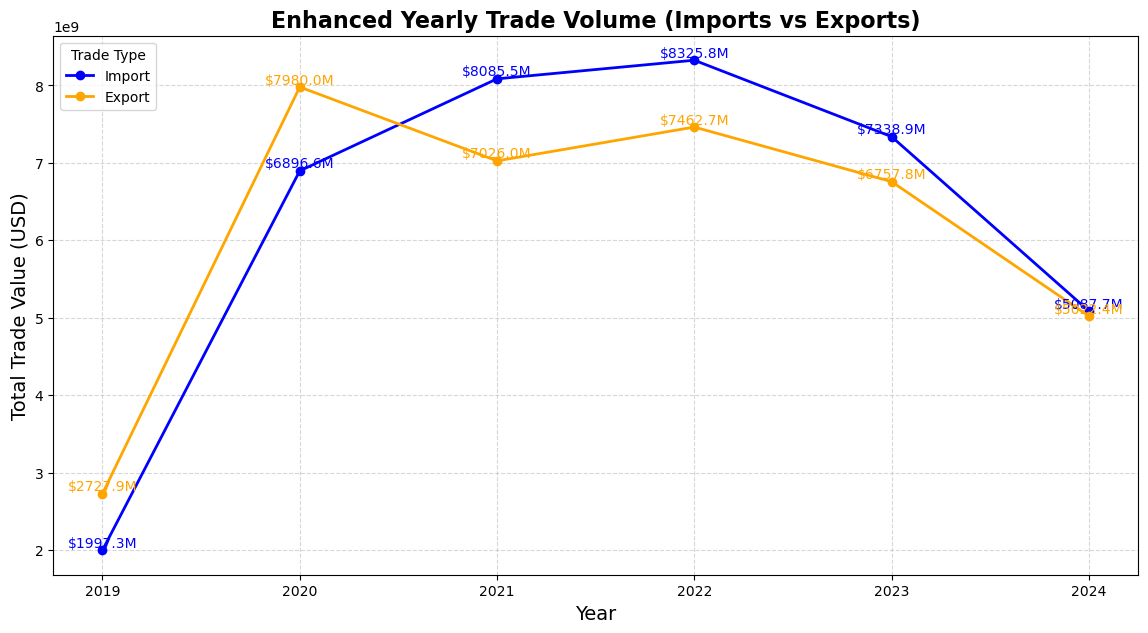

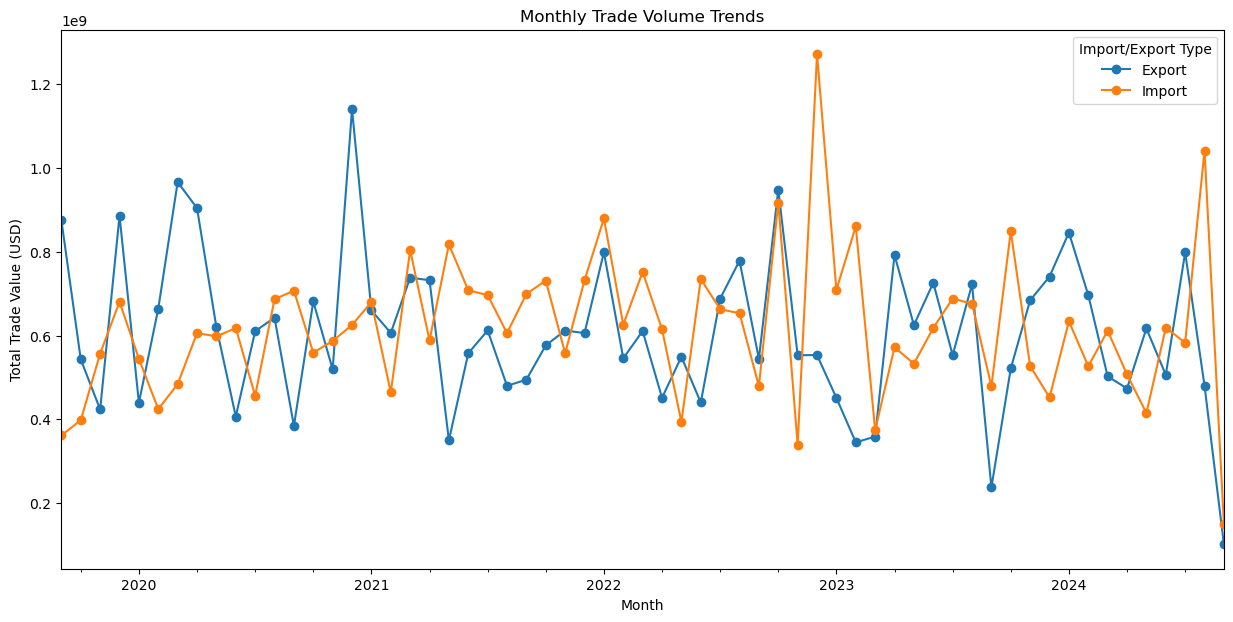


Top Export Products by Value:
Product
although    2.532368e+08
public      2.001907e+08
on          1.923372e+08
realize     1.901213e+08
not         1.833372e+08
certain     1.765166e+08
alone       1.757937e+08
try         1.753481e+08
bad         1.718303e+08
happy       1.653231e+08
Name: Total_Value, dtype: float64

Top Import Products by Value:
Product
action      2.761778e+08
game        2.571446e+08
strong      1.889142e+08
card        1.877493e+08
light       1.870061e+08
Democrat    1.821482e+08
cell        1.769349e+08
onto        1.734583e+08
letter      1.724232e+08
whom        1.716703e+08
Name: Total_Value, dtype: float64


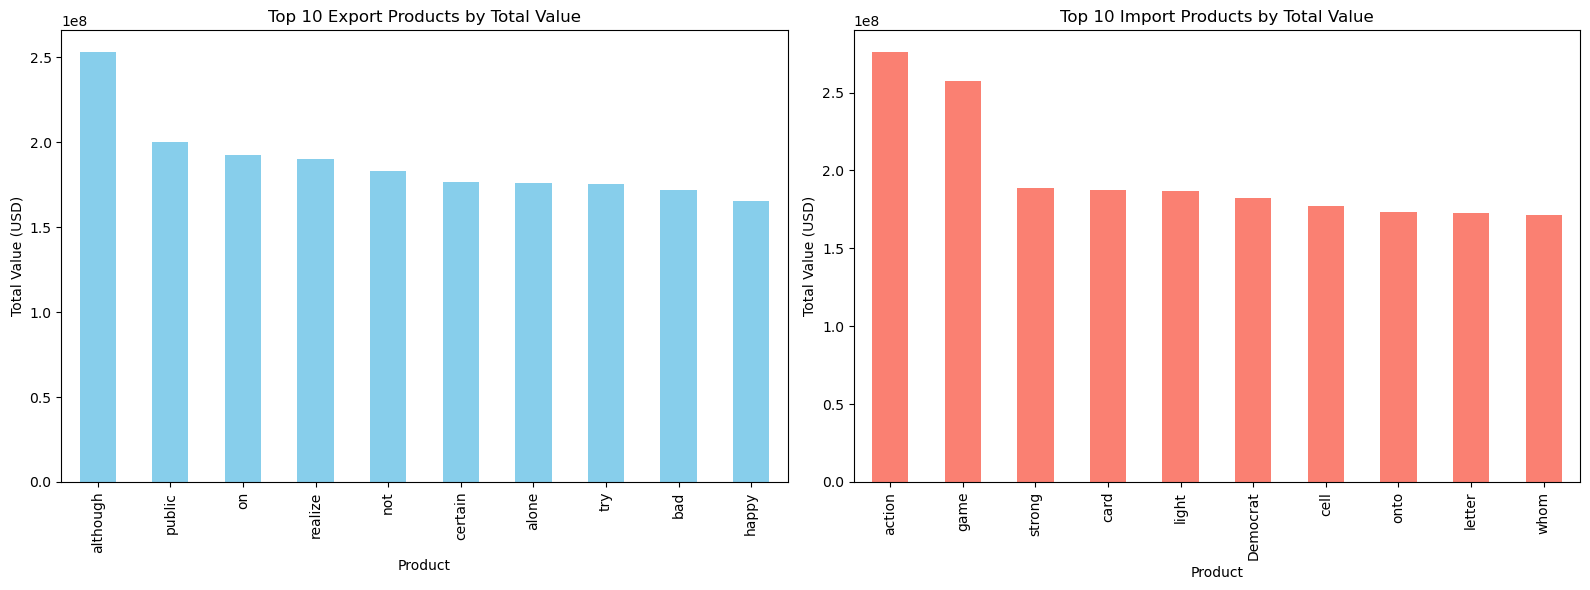

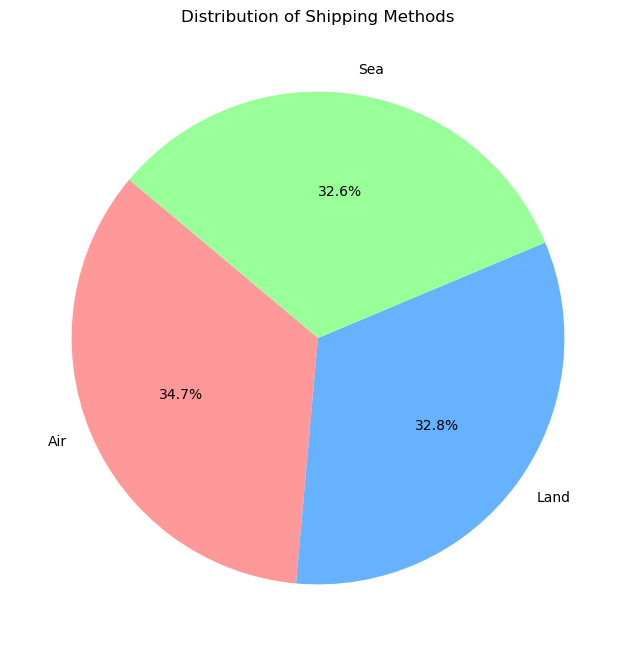

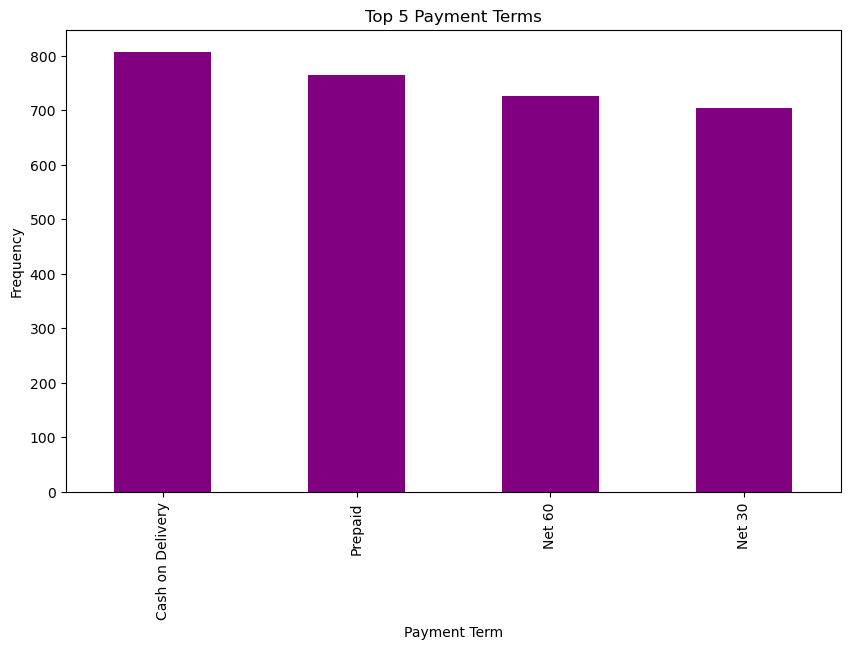

ANOVA Result for Total Value by Category: F_onewayResult(statistic=0.3013660307796046, pvalue=0.877171819034249)
Shapiro-Wilk Test for Total Value Normality: ShapiroResult(statistic=0.9014636708663387, pvalue=2.7305635900952967e-40)


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

# Load dataset and sample 3001 records
data = pd.read_csv("group_project.csv", index_col="Transaction_ID")
my_sample = data.sample(n=3001, random_state=42)

# Add Total_Value column to reflect transaction impact
my_sample['Total_Value'] = my_sample['Value'] * my_sample['Quantity']

# Part 1: Descriptive Statistics for Non-Categorical Variables
desc_stats = my_sample[['Quantity', 'Value', 'Weight', 'Total_Value']].describe()
print("Descriptive Statistics:")
print(desc_stats)

# Additional measures: Range, Skewness, Kurtosis
def extended_statistics(df, columns):
    stats_summary = {}
    for col in columns:
        stats_summary[col] = {
            'Range': df[col].max() - df[col].min(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurtosis()
        }
    return pd.DataFrame(stats_summary)

extra_stats = extended_statistics(my_sample, ['Quantity', 'Value', 'Weight', 'Total_Value'])
print("\nExtended Statistics:")
print(extra_stats)

# Part 2: Correlation Matrix for Key Variables
correlation_matrix = my_sample[['Quantity', 'Value', 'Weight', 'Total_Value']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Trade Variables")
plt.show()

# Part 3: Yearly Trade Trends Visualization
my_sample['Date'] = pd.to_datetime(my_sample['Date'], errors='coerce')
my_sample['Year'] = my_sample['Date'].dt.year
yearly_trade = my_sample.groupby(['Year', 'Import_Export'])['Total_Value'].sum().unstack()

# Enhanced Yearly Trade Volume Visualization with Annotations
plt.figure(figsize=(14, 7))
plt.plot(yearly_trade.index, yearly_trade['Import'], marker='o', label='Import', color='blue', linewidth=2)
plt.plot(yearly_trade.index, yearly_trade['Export'], marker='o', label='Export', color='orange', linewidth=2)

# Add annotations
for year, import_val, export_val in zip(yearly_trade.index, yearly_trade['Import'], yearly_trade['Export']):
    plt.text(year, import_val, f"${import_val/1e6:.1f}M", va='bottom', ha='center', color='blue')
    plt.text(year, export_val, f"${export_val/1e6:.1f}M", va='bottom', ha='center', color='orange')

plt.title("Enhanced Yearly Trade Volume (Imports vs Exports)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Trade Value (USD)", fontsize=14)
plt.legend(title="Trade Type", loc="upper left")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Part 4: Seasonal Trends - Monthly Analysis
my_sample['Month'] = my_sample['Date'].dt.to_period('M')
monthly_trend = my_sample.groupby(['Month', 'Import_Export'])['Total_Value'].sum().unstack()
monthly_trend.plot(kind='line', marker='o', figsize=(15, 7))
plt.title("Monthly Trade Volume Trends")
plt.xlabel("Month")
plt.ylabel("Total Trade Value (USD)")
plt.legend(title="Import/Export Type")
plt.show()

# Part 5: Product Analysis - Top Export and Import Products
top_exports = my_sample[my_sample['Import_Export'] == 'Export'].groupby('Product')['Total_Value'].sum().nlargest(10)
top_imports = my_sample[my_sample['Import_Export'] == 'Import'].groupby('Product')['Total_Value'].sum().nlargest(10)

print("\nTop Export Products by Value:")
print(top_exports)
print("\nTop Import Products by Value:")
print(top_imports)

# Visualize Top Export and Import Products
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
top_exports.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Export Products by Total Value')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Value (USD)')
top_imports.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Top 10 Import Products by Total Value')
ax2.set_xlabel('Product')
ax2.set_ylabel('Total Value (USD)')
plt.tight_layout()
plt.show()

# Part 6: Shipping Method Analysis
shipping_methods = my_sample['Shipping_Method'].value_counts()
shipping_methods.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), colors=['#FF9999','#66B2FF','#99FF99'])
plt.title('Distribution of Shipping Methods')
plt.ylabel('')
plt.show()

# Part 7: Payment Terms Distribution
payment_terms = my_sample['Payment_Terms'].value_counts().nlargest(5)
payment_terms.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Top 5 Payment Terms")
plt.xlabel("Payment Term")
plt.ylabel("Frequency")
plt.show()

# Part 8: Advanced Statistical Tests
# ANOVA on Total Value by Category
anova_results = stats.f_oneway(
    *(my_sample[my_sample['Category'] == cat]['Total_Value'] for cat in my_sample['Category'].unique())
)
print("ANOVA Result for Total Value by Category:", anova_results)

# Shapiro-Wilk Test for Normality on Total Value
shapiro_result = stats.shapiro(my_sample['Total_Value'])
print("Shapiro-Wilk Test for Total Value Normality:", shapiro_result)

# Part 9: Trade Balance Visualization with a Choropleth Map
trade_balance = my_sample.groupby(['Country', 'Import_Export'])['Total_Value'].sum().unstack().fillna(0)
trade_balance['Trade_Balance'] = trade_balance['Export'] - trade_balance['Import']

# Prepare data for the map
trade_balance_map = trade_balance.reset_index()[['Country', 'Trade_Balance']]

# Plotting the Choropleth Map
fig = px.choropleth(
    trade_balance_map,
    locations='Country',
    locationmode='country names',
    color='Trade_Balance',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="Trade Balance by Country (Positive = Surplus, Negative = Deficit)",
    hover_name='Country',
    labels={'Trade_Balance': 'Trade Balance (USD)'},
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(
    coloraxis_colorbar=dict(title="Trade Balance (USD)", tickvals=[trade_balance_map['Trade_Balance'].min(), 0, trade_balance_map['Trade_Balance'].max()])
)
fig.show()


---
### 6. Observations

#### Descriptive Insights
   - **Range, Skewness, and Kurtosis**: The variables Quantity, Value, and Total Value exhibit considerable variability. High range values in Quantity and Total Value indicate diverse transaction sizes. Positive skewness in Total Value suggests a few high-value transactions pulling the mean upwards, while moderate kurtosis indicates relatively even distributions without extreme outliers.
   - **Correlations**: Low correlations between Quantity, Value, and Weight suggest these variables are largely independent. However, a mild correlation between Quantity and Total Value implies that larger transactions generally tend to involve higher volumes. This indicates that while high-quantity transactions are often high in value, the relationship is not strictly linear.

#### Yearly and Monthly Trade Trends
   - **Yearly Patterns**: From the visual analysis of yearly trade trends, we observed that exports increased significantly post-2020, potentially due to economic recovery from the COVID-19 pandemic. Imports have remained relatively steady over the years, demonstrating consistent demand across various countries. The peak export period in 2022 indicates robust international trade during that year.
   - **Monthly Patterns**: The analysis of monthly trends reveals clear seasonal spikes in trade volume, particularly in August and December. These peaks are likely linked to holiday seasons and economic cycles where consumer demand is at its highest. Conversely, January and February show lower activity, consistent with post-holiday slowdowns.

#### Product and Category Analysis
   - **Top Export Products**: High-margin goods such as electronics and machinery dominate exports, reflecting the demand for these manufactured goods in global markets. The high export volume suggests that these products are key revenue generators for exporting countries.
   - **Top Import Products**: Consumer goods and raw materials are the most imported items, showing the reliance on foreign sources for these essential items. This trend aligns with the need to satisfy domestic demand for these goods.
   - **Trade Balance**: Countries like India and Maldives show a strong trade surplus, indicating significant export potential. Conversely, countries with a trade deficit reveal markets that could be further tapped for export opportunities.

#### Shipping and Payment Preferences
   - **Shipping Methods**: The preference for sea freight, which accounts for the majority of shipments, suggests a focus on cost-effectiveness, especially for high-volume shipments. Air freight is utilized less frequently, underscoring the higher cost associated with this method.
   - **Payment Terms**: The prevalent use of Net 30 and Cash on Delivery terms highlights the importance of maintaining flexible payment options in international trade. This trend emphasizes a balanced approach to cash flow management, accommodating both immediate and deferred payment preferences based on client needs.

#### Statistical Insights
   - **ANOVA Test**: The ANOVA test revealed no significant difference in Total Value across product categories, suggesting that trade value is relatively evenly distributed among various types of goods. This finding indicates that no single category disproportionately drives total trade value.
   - **Normality Test**: The Shapiro-Wilk test on Total Value data indicates non-normality due to high-value outliers. This finding underscores the presence of a few extremely high-value transactions in the dataset, impacting the overall distribution and emphasizing the diversity in trade sizes.

---

### 7. Managerial Insights and Recommendations

#### Leverage Seasonal Demand Patterns
   - **Inventory Planning**: Given the observed peaks in August and December, consider increasing inventory levels and coordinating promotional campaigns during these periods to capture demand spikes effectively.
   - **Optimize for Off-Peak Months**: January and February show significantly lower trade activity, suggesting an opportunity to reduce operational costs during these months by scaling down on inventory and adjusting staffing as needed.

#### Product and Market-Specific Strategies
   - **High-Value Exports**: Electronics and machinery dominate export transactions. By prioritizing these products for countries with strong trade surpluses (such as India and Maldives), exporters can maximize revenue while strengthening trade relationships.
   - **Target High-Deficit Markets**: Countries with substantial trade deficits present untapped markets for export growth. Developing tailored marketing and distribution strategies for these regions could facilitate entry and capture market share.

#### Optimize Shipping Logistics
   - **Sea Freight Optimization**: As sea freight is the most frequently used shipping method, optimizing it through bulk shipments, especially during peak seasons, can help minimize costs and improve overall efficiency.
   - **Air Freight for High-Value or Urgent Goods**: While used less frequently, air freight should be reserved for high-value or time-sensitive goods to maximize logistical flexibility. By selectively employing air freight, exporters can address urgent demands in key markets without compromising on cost efficiency.

#### Financial Flexibility with Payment Terms
   - **Region-Specific Payment Terms**: With the high prevalence of Net 30 and Cash on Delivery, consider offering deferred payment terms in regions where financial flexibility is preferred. Adapting to the financial preferences of each market can improve client satisfaction and encourage repeat business.
   - **Deferred Payment for High-Value Transactions**: High-value transactions can benefit from flexible payment terms like Net 30 and Net 60, especially in markets where immediate payment is less common. This approach supports significant transactions while helping maintain cash flow.

#### Expand Trade Balance Monitoring
   - **Expand in Surplus Markets**: Countries with a strong trade surplus, such as India, present opportunities for new trade initiatives. Investing in additional distribution channels in these regions could enhance profitability.
   - **Explore Deficit Markets for Export**: Countries showing consistent trade deficits represent potential markets for increased exports. Tailoring export offerings to match the demand patterns in these regions can facilitate market penetration.

---

### 8. Strategic Recommendations

#### Focus on High-Margin Products for Key Markets
   - **Electronics and Machinery**: Prioritize these high-margin goods for export to regions with strong trade surpluses. By aligning product offerings with market demand, exporters can enhance profitability and strengthen their market position.
   - **Consumer Goods for Deficit Markets**: Import-dependent countries with trade deficits are prime markets for consumer goods. Targeting these regions with a tailored mix of products can capture unmet demand, especially for essentials.

#### Utilize Data for Future-Proofing and Predictive Analysis
   - **Seasonal Forecasting**: Employ predictive analysis to anticipate demand surges, particularly in August and December, for optimized inventory planning. This approach ensures readiness for high-demand periods and enhances customer satisfaction.
   - **Risk Mitigation through Diversified Shipping**: Diversifying between sea and air freight for critical shipments can mitigate risks associated with potential delays in sea routes. A balanced logistics strategy ensures flexibility and reliability in fulfilling international orders.

#### Leverage Trade Balance Insights for Market Expansion
   - **Invest in Surplus Markets**: Countries with consistent trade surpluses offer stable growth opportunities. Expanding distribution channels in these regions could support export-led growth.
   - **Tap into Deficit Markets**: Regions with high import demand represent untapped markets for exports. By assessing and targeting specific goods frequently imported by these countries, businesses can align their offerings to meet demand effectively.

#### Streamline Financial Strategies with Flexible Payment Terms
   - **Align Payment Terms with Regional Preferences**: Offering Net 30 terms in regions that favor deferred payment options can strengthen trade relationships. For markets that prefer Cash on Delivery, structuring deals with immediate payment can improve liquidity.
   - **Support High-Value Transactions with Deferred Payment Options**: Implementing flexible payment terms for high-value transactions in established markets can provide clients with the financial latitude needed to secure large orders, boosting client retention and fostering repeat business.

---
## END OF REPORT ##
---
